In [20]:
import pandas as pd
import scipy as sc
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import t
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import datasets
from pandas.plotting import scatter_matrix
import seaborn
import statsmodels.api as sm

In [21]:
# https://scipy-lectures.org/packages/statistics/auto_examples/plot_iris_analysis.html
# https://svaditya.github.io/oldblog/chi_square_and_t_tests_on_iris_data.html
# https://rpubs.com/Tanzir/Statistical-Analysis_IRIS-Data
# https://www.kaggle.com/bhagyashree12/anova-test-on-iris-dataset
# https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/
# https://medium.com/analytics-vidhya/exploratory-data-analysis-iris-dataset-4df6f045cda

In [22]:
iris = datasets.load_iris()

In [23]:
X = iris.data
y = iris.target

In [24]:
model=sm.OLS(y,X)
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1267.
Date:                Sat, 04 Dec 2021   Prob (F-statistic):                   3.17e-112
Time:                        14:27:48   Log-Likelihood:                          17.009
No. Observations:                 150   AIC:                                     -26.02
Df Residuals:                     146   BIC:                                     -13.98
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0845      0.049     -1.720      0.088      -0.182       0.013
x2            -0.0236      0.057     -0.415      0.679      -0.136       0.089
x3             0.2249      0.057      3.968      0.000       0.113       0.337
x4             0.5997      0.094      6.392      0.000       0.414       0.785
==============================================================================
Omnibus:                        0.384   Durbin-Watson:                   1.149
Prob(Omnibus):                  0.825   Jarque-Bera (JB):                0.128
Skew:                          -0.026   Prob(JB):                        0.938
Kurtosis:                       3.133   Cond. No.                         50.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
df_iris = pd.DataFrame(iris.data, columns=['sepalLength','sepalWidth','petalLength','petalWidth'])
df_iris.head()

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
df2_iris = pd.DataFrame(iris.target, columns=['target'])
df2_iris.head()

,target
0,0
1,0
2,0
3,0
4,0


## Data Visualization

In [27]:
iris = pd.concat([df_iris, df2_iris], axis=1)
iris.head()

,sepalLength,sepalWidth,petalLength,petalWidth,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
iris.describe()

,sepalLength,sepalWidth,petalLength,petalWidth,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


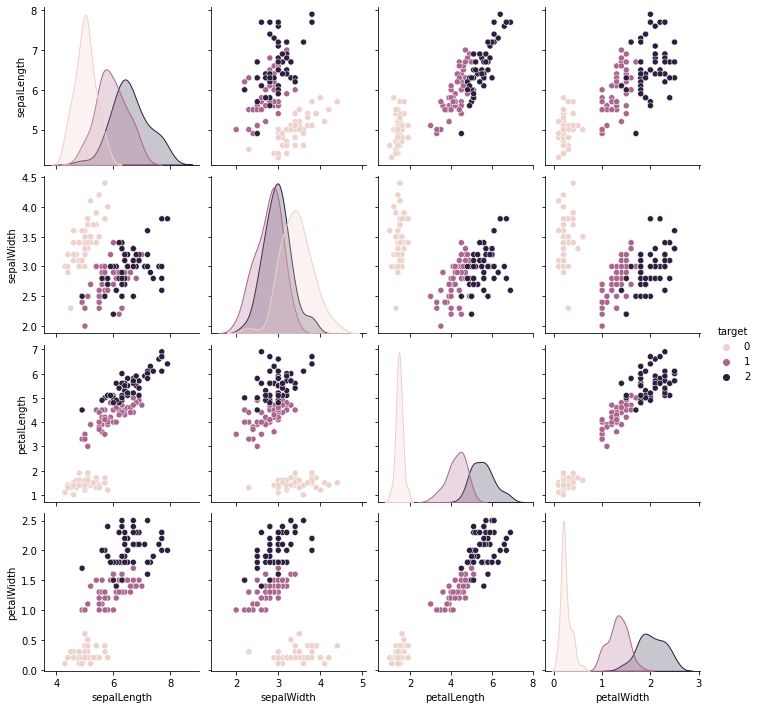

In [29]:
seaborn.pairplot(iris, hue="target")
plt.show()